**Analyzing Titanic data set for various insights and to predict if the passenger has survived**

**Importing some libraries that will be required for the analysis and model creation**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

**Reading the csv data and converting to pandas dataframe for further analysis**

In [2]:
data=pd.read_csv('Titanic_train.csv')
df1=pd.DataFrame(data)
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Eploratory Data Analysis**

In [3]:
df1.isnull()#to check null value-but this method is not good for large data set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df1.info()# gives us information about all columns and rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#We will plot a heat map to check the presence of null values in different columns.
#This method is helpful for large datasets to mark the presence of null values.

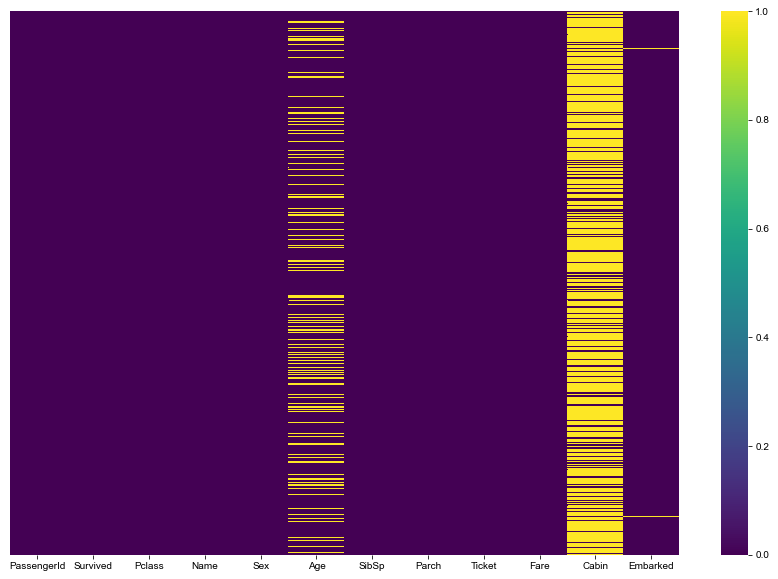

In [6]:
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df1.isna(),yticklabels=False,cmap="viridis")
sns.set(font_scale=1.25)
plt.show()

From the above plot we can see that there are null values in 'Age','cabin' and 'Embarked' column

In [7]:
df1.isna().sum()#This line of code will give us the count of null values in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Data Cleaning Activity-
# We will check the percentage of missing values for 'Cabin' and 'Age' column.
# This will give us an idea about how to proceed with cleaning activity in each column where null values is present

In [9]:
p=df1['Cabin'].isna().sum()/len(df1)*100
print(p,'%')

77.10437710437711 %


In [10]:
a= df1['Age'].isna().sum()/len(df1)*100
print(a,'%')

19.865319865319865 %


As the percentage of missing values is much higher(77%) in the column 'Cabin', so we will drop the column. As the percentage of missing values is not very high(19.8%) in the coumn 'Age', we will impute the missing values by some method of imputation

In [11]:
# We wil try to explore the data by plotitng the some graphs and trying to find out some usefull insights from the data

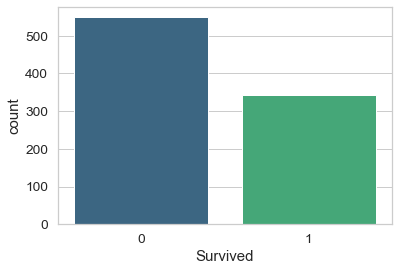

In [12]:
#Total count of person died or survived

sns.set_style('whitegrid')
sns.countplot(x='Survived', data= df1,palette='viridis')
plt.show()

From the above plot we can conclude that most passengers of the ship did not survive

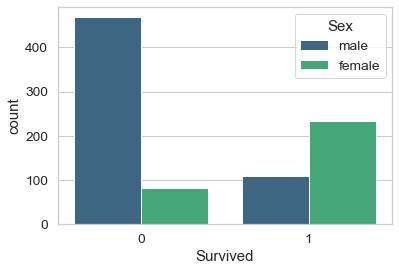

In [13]:
#Comparion of gender with survival

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data= df1, palette='viridis')
plt.show()

From the above plot we can conclude that out of persons which did not survive- most are males.
Out of persons which survived- most are females

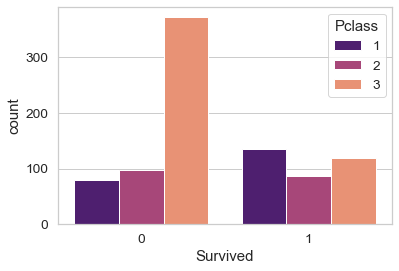

In [14]:
#Comparion of survivors with Passenger class: 1 is for the richest

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass', data= df1, palette='magma')
plt.show()

Out of the persons survived- Pclass= 1 are most. 
Out of the person doesnot survived- Pclass= 3 are most

C:\My installs\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

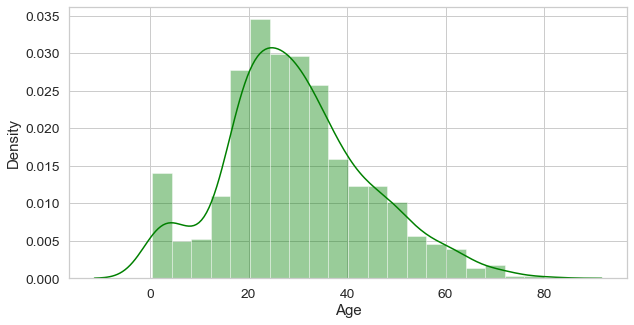

In [15]:
#We will plot the distribution of the feature AGE

plt.figure(figsize=(10,5))
sns. distplot(df1['Age'].dropna(),color='green', bins=20)

We can consider the Age of the passengers to be Right Skewed

C:\My installs\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

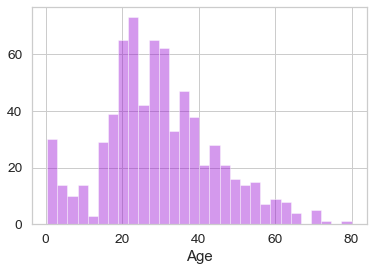

In [16]:
#ploting without Kernel Densilty Engine(kde)

sns. distplot(df1['Age'].dropna(),kde=False,color='darkviolet', bins=30)

There is a positive skewness in the above plot

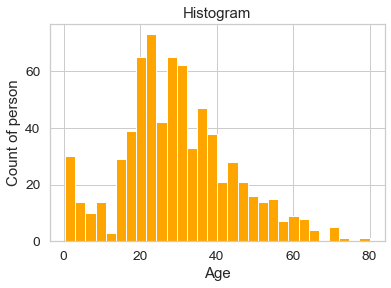

In [17]:
#ploting the historam using matplotlib

df1['Age'].hist(bins=30,color='orange')
plt.xlabel('Age')
plt.ylabel('Count of person')
plt.title('Histogram')
plt.show()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

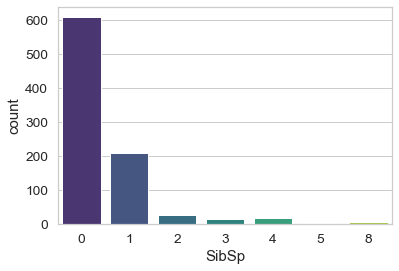

In [18]:
#Countplot of Sibling or Spouse

sns.countplot(x='SibSp',data=df1,palette='viridis')

Most of the passengers travelling in the ship doesnot have any sibling or spouse travelling with them. 
Around 200 of the passengers have 1 sibling or spouse. 
Very less passengers have more than one sibling or spouse

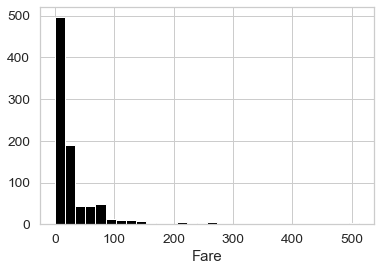

In [19]:
#Train fare distribution plot

df1['Fare'].hist(bins=30,color='black')
plt.xlabel('Fare')
plt.show()

Most of the fare lies between 0 - 10 $

C:\My installs\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

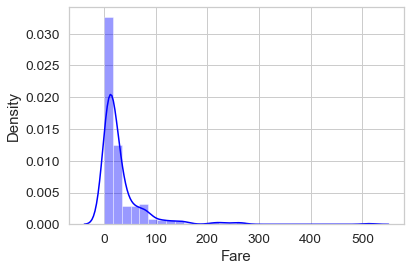

In [20]:
#distribution of fare

sns.distplot(df1['Fare'],color='blue',bins=30)

The above plot is also showing positive skewness

**Now we will impute the Null values in 'Age' column**

C:\My installs\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

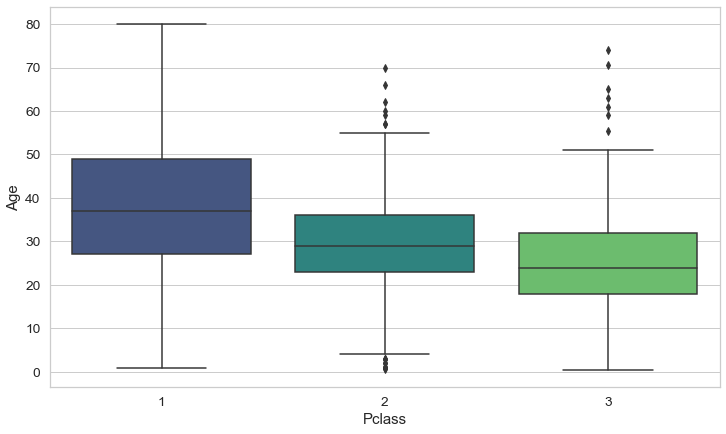

In [21]:
#Checking outliers of Age for imputing missing values through a box plot

plt.figure(figsize=(12,7))
sns.boxplot(df1['Pclass'],df1['Age'],palette='viridis')

From the above plot we can see that Pclass = 2 and Pclass = 3 have outliers

**We will impute the null values in 'Age' by the mean values of 'Age' grouped by each Passenger class**

In [22]:
# Mean of 'Age' for passengers with 'Pclass' =1

p1 = np.round(df1[df1['Pclass']==1]['Age'].mean())
p1

38.0

In [23]:
# Mean of 'Age' for passengers with 'Pclass' =2

p2 = np.round(df1[df1['Pclass']==2]['Age'].mean())
p2

30.0

In [24]:
# Mean of 'Age' for passengers with 'Pclass' =3

p3 = np.round(df1[df1['Pclass']==3]['Age'].mean())
p3

25.0

In [25]:
# We are defining function for imputing the null values

def f1 (Cols):
    Age=Cols[0]
    Pclass=Cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return p1
        elif Pclass==2:
            return p2
        else:
            return p3
    else:
        return Age

In [26]:
#Now we will apply the above defined function to the main dataframe df1

In [27]:
df1['Age']= df1[['Age','Pclass']].apply(f1,axis=1)

In [28]:
df1.isnull().sum()# After imputation there is no  ull value in 'Age' colum

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
df1.drop('Cabin',axis=1,inplace=True)# we are dropping the column 'cabin'
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [30]:
df1.isnull().sum()# after dropping cabin cabin we have 2 null values in Embarked column

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [31]:
df1.dropna(inplace=True)# we are dropping the rows which contain  null values, as there are only 2 rows, which is very insignificant in this case, hence we are droppign the 2 rows.

In [32]:
df1.isnull().sum()# now we donot have any null values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


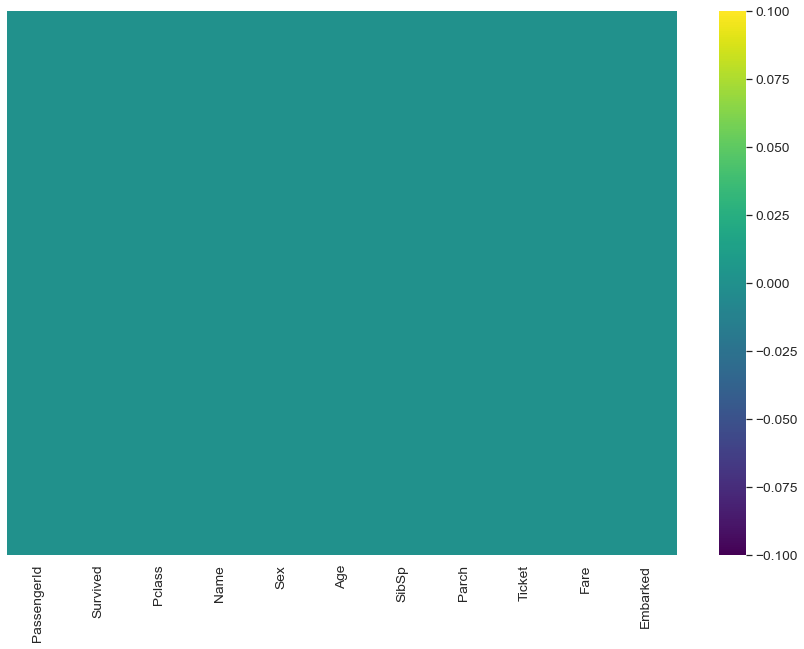

In [34]:
#heatmap for null values- since no yellow line, so there is no null value

f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df1.isna(),yticklabels=False,cmap="viridis")
sns.set(font_scale=1.25)
plt.show()

From the above plot we can conclude that there are no null values in the data set.

In [35]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Converting Categorical columns to Machine understandable format through get dummies**

In [36]:
# This is an important categorical column for our model.
# So this has to be converted to a formt which is understandable by the machine

sex=pd.get_dummies(df1['Sex'])

In [37]:
# This is an important categorical column for our model.
# So this has to be converted to a formt which is understandable by the machine

embark=pd.get_dummies(df1['Embarked'])

In [38]:
#we are dropping 'PassengerId','Name','Ticket' as they are not importat features for the model.
#However we are dropping 'Sex','Embarked' as we have already converted these colums to machinice understanable format

df1.drop(['PassengerId','Name','Ticket','Sex','Embarked'],axis=1,inplace=True)

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 48.6 KB


In [40]:
# We are concatinating the 'Sex','Embarked' column in get dummies format to the original data frame

df1= pd.concat([df1,sex,embark],axis=1)

In [41]:
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


**Selecting dependent and independent feature**

In [42]:
# Split X and Y
# 'Survived' is our dependent variable(label) and rest are independent variable (feature)

X= df1.drop('Survived', axis=1)
y= df1['Survived']

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  889 non-null    int64  
 1   Age     889 non-null    float64
 2   SibSp   889 non-null    int64  
 3   Parch   889 non-null    int64  
 4   Fare    889 non-null    float64
 5   female  889 non-null    uint8  
 6   male    889 non-null    uint8  
 7   C       889 non-null    uint8  
 8   Q       889 non-null    uint8  
 9   S       889 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 46.0 KB


In [44]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [48]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

**Diving the whole dataset (X and y) into traning and testing**

In [49]:
# Splitting X and y into Train and Test
# We have taken the test sive as 20 % and training size as 80%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [50]:
X_train

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
307,1,17.0,1,0,108.9000,1,0,1,0,0
229,3,25.0,3,1,25.4667,1,0,0,0,1
82,3,25.0,0,0,7.7875,1,0,0,1,0
353,3,25.0,1,0,17.8000,0,1,0,0,1
707,1,42.0,0,0,26.2875,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
576,2,34.0,0,0,13.0000,1,0,0,0,1
840,3,20.0,0,0,7.9250,0,1,0,0,1
338,3,45.0,0,0,8.0500,0,1,0,0,1
524,3,25.0,0,0,7.2292,0,1,1,0,0


In [51]:
X_test

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
511,3,25.0,0,0,8.0500,0,1,0,0,1
613,3,25.0,0,0,7.7500,0,1,0,1,0
615,2,24.0,1,2,65.0000,1,0,0,0,1
337,1,41.0,0,0,134.5000,1,0,1,0,0
718,3,25.0,0,0,15.5000,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
155,1,51.0,0,1,61.3792,0,1,1,0,0
450,2,36.0,1,2,27.7500,0,1,0,0,1
756,3,28.0,0,0,7.7958,0,1,0,0,1
187,1,45.0,0,0,26.5500,0,1,0,0,1


In [52]:
y_train

307    1
229    0
82     1
353    0
707    1
      ..
576    1
840    0
338    1
524    0
865    1
Name: Survived, Length: 711, dtype: int64

In [53]:
y_test

511    0
613    0
615    1
337    1
718    0
      ..
155    0
450    0
756    0
187    1
180    0
Name: Survived, Length: 178, dtype: int64

**Machine Learning Model Creation- Logistic Regression**

In [54]:
# Model Training
# Input is X_train and y_train

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train,y_train)

C:\My installs\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
# Testing the model through predictions for X_test

Pr= lr.predict(X_test)

**Checking Accuracy of the model by Confusin Matrix**

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
#printing the confusin matrix

cm= confusion_matrix(y_test, Pr)
cm

array([[98,  9],
       [24, 47]], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
#Checking the accuracy score(%)

accuracy= accuracy_score(y_test,Pr)
a=accuracy*100
print(a,'%')

81.46067415730337 %


**We have created a Logistic Regression Model With 81.46% accuracy**